In [1]:
%matplotlib inline

import pandas as pd
import time
import warnings
import os

from strategy.idtStrategy import IDTStrategy
from optimizer import Optimizer
from analyzer import Analyzer

if __name__ == "__main__":

    warnings.filterwarnings('ignore')
    
    tic = time.time()
    symbol = 'NIFTY'
    startYr = None
    endYr = None
    initCap = 100000
    strat = IDTStrategy(symbol, initCap, startYr=startYr, endYr=endYr)
    
    #combosGen = strat.combosGenerator()
    #combos= []
    #for combo in combosGen:
    #    if combo[5] == combo[6]:
    #        combos.append(combo)
    #print(len(combos)) 
    #opt = Optimizer(strat, combos)
    #opt.run()
    
    #res = opt.getResults()
    #best = opt.getBestComboSharpe()
    #path = 'summary'+os.sep+symbol+os.sep+str(best[0])
    #if not os.path.exists(path):
    #    os.makedirs(path)
    #s = pd.Series()
    #s.loc['Best Combo'] = best
     
    #s.to_csv(path+os.sep+'BestCombo.csv')
    #res.to_csv(path+os.sep+'AllCombinations.csv')
    
    best = (15, 7, 12, 25, 50, 20, 20, 0.2, 0.1, 0.15, 0.3, 0.2, -0.15)
    #best = (15, 7, 12, 25, 50, 20, 20, 0.4, 0.3, 0.15, 0.4, 0.3, -0.15)
    returns, buyAndHoldReturns, transactions = strat.run(best, True)
    
    #print('Combinations Tested:', len(combos))
    print('Time Taken:', (time.time() - tic)/60)
    print('Best Combination:', best)

Combo (15, 7, 12, 25, 50, 20, 20, 0.2, 0.1, 0.15, 0.3, 0.2, -0.15)
Time Taken: 0.21377424001693726
Best Combination: (15, 7, 12, 25, 50, 20, 20, 0.2, 0.1, 0.15, 0.3, 0.2, -0.15)


Entire data start date: 2013-07-03
Entire data end date: 2018-10-12
Backtest Months: 61



Performance Statistics    Backtest
annual_return (%)        22.923502
annual_volatility (%)    12.489159
sharpe_ratio              1.652595
calmar_ratio              2.180252
max_drawdown (%)        -10.514153
omega_ratio               1.161424
sortino_ratio             1.355427
skew                      6.684454
kurtosis                173.395626
tail_ratio                0.904626
alpha                     0.211553
beta                     -0.045825

Worst Drawdown Periods net drawdown in %  peak date valley date recovery date  \
0                                  10.51 2014-05-16  2014-09-15    2014-12-09   
1                                   9.39 2018-03-16  2018-10-12           NaT   
2                                   8.47 2015-04-27  2015-08-11    2015-09-22   
3                                   7.21 2015-01-21  2015-03-05    2015-04-06   
4                                   7.02 2013-09-25  2013-11-18    2013-12-09   

Worst Drawdown Periods duration  
0                           148  
1                           NaN  
2                           107  
3                            54  
4                            53

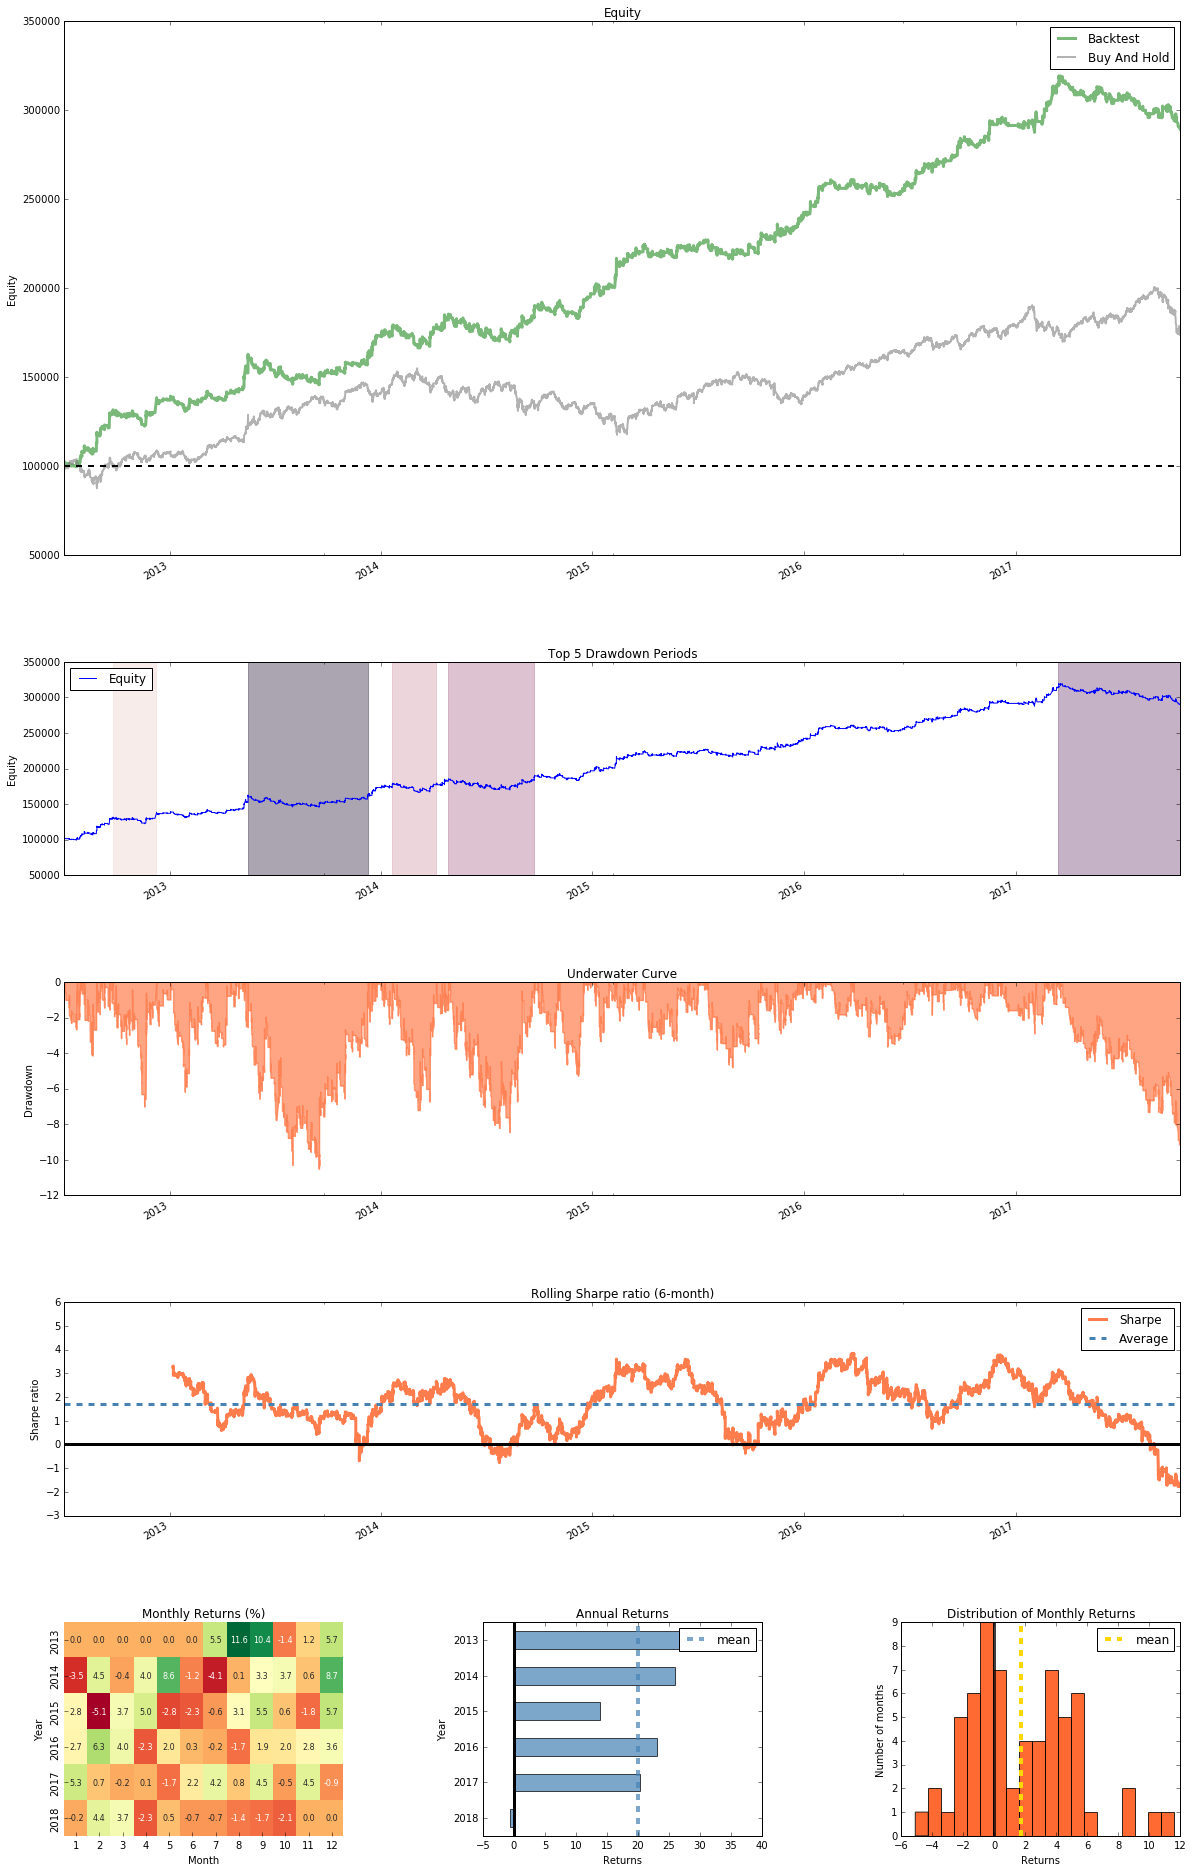

In [2]:
a = Analyzer(initCap)
a.createReturnsTearSheet(returns=returns, buyAndHoldReturns=buyAndHoldReturns)

Summary Stats                All Trades  Short Trades  Long Trades
Total Number of Round Trips     1136.00        477.00       659.00
Hit Ratio (%)                     41.99         46.54        38.69
Winning Round Trips              477.00        222.00       255.00
Losing Round Trips               659.00        255.00       404.00
Even Round Trips                   0.00          0.00         0.00

PnL Stats                                 All Trades  Short Trades  \
Total Profit (in Rs.)                      189405.00      93843.75   
Gross Profit (in Rs.)                      845696.25     447731.25   
Gross Loss (in Rs.)                       -429091.25    -258487.50   
Profit Factor                                   1.97          1.73   
Average Nett. Profit (in Rs.)                 166.73        196.74   
Average Profit (Winning Trades) (in Rs.)     1572.95       1816.81   
Average Loss (Losing Trades) (in Rs.)        -851.12      -1213.68   
Average Profit:Average Loss                     1.85          1.50   
Largest Winning Trade (in Rs.)               7837.50       7136.25   
Largest Losing Trade (in Rs.)               -1736.25      -1736.25   

PnL Stats                                 Long Trades  
Total Profit (in Rs.)                        95561.25  
Gross Profit (in Rs.)                       397965.00  
Gross Loss (in Rs.)                        -170603.75  
Profit Factor                                    2.33  
Average Nett. Profit (in Rs.)                  145.01  
Average Profit (Winning Trades) (in Rs.)      1360.65  
Average Loss (Losing Trades) (in Rs.)         -622.29  
Average Profit:Average Loss                      2.19  
Largest Winning Trade (in Rs.)                7837.50  
Largest Losing Trade (in Rs.)                 -870.00

Duration Stats        All Trades    Short Trades     Long Trades
Average Duration 00:59:12.464788 01:08:18.113207 00:52:37.511380
Median Duration         00:30:00        00:45:00        00:30:00

Return Stats (in %)               All Trades  Short Trades  Long Trades
Average Returns                         0.09          0.13         0.07
Average Returns (Winning Trades)        0.82          0.96         0.69
Average Returns (Losing Trades)        -0.43         -0.61        -0.32
Median Returns                         -0.27         -0.49        -0.27
Median Returns (Winning Trades)         0.66          0.86         0.59
Median Returns (Losing Trades)         -0.37         -0.59        -0.33
Largest Winning Trade Return            5.03          4.66         5.03
Largest Losing Trade Return            -0.87         -0.87        -0.46

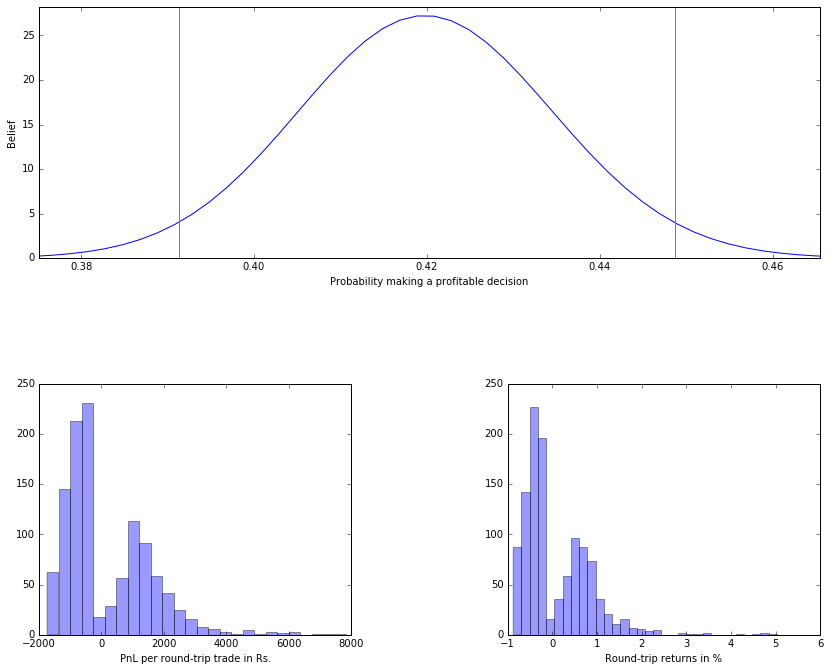

In [3]:
a.createRoundTripTearSheet(transactions)